**<center><font size = 7> VGG16 ile Beyinde İnme Tespiti</font></center>**
***
**yazar** : Yusuf Oğuzay Bilir

**tarih** : 27/06/2022

**İçindekiler**
- <a href='#baslangic'>1. Çalışmanın Önizlemesi</a>
    - <a href='#veriseti'>1.1 Veri Setinin Açıklanması</a>
    - <a href='#inme'>1.2. İnme Nedir ?</a>
- <a href='#ortam'>2. Çalışma Zamanımızı Hazırlıyoruz</a>
- <a href='#import'>3. Data Import and Preprocessing</a>
    - <a href='#verileri_ekleme'>3.1 Verilerin Manuel Olarak Eklenmesi</a>
    - <a href='#onhazirlik'>3.2 Gerekli Kütüphanelerin ve Fonksiyonların Çağırılması</a>
    - <a href='#isleme'>3.3 Verileri İşleme</a>
- <a href='#eda'>4. Veri Setinin Dağılımı</a>
    - <a href='#aug'>4.1. Data Augmentation</a>
        - <a href='#demo'>4.1.1. Demo</a>
        - <a href='#apply'>4.1.2. Apply</a>
    - <a href='#build'>4.2. Model Building</a>
    - <a href='#perf'>4.3. Model Performance</a>
- <a href='#concl'>5. Conclusions</a>

# <a id='baslangic'>1. Çalışmanın Önizlemesi</a>
Bu çalışma Teknofest tarafından 2021 yılında Sağlıkta Yapay Zeka yarışması kapsamında yarışmacılara verilen veri seti üzerinde sınıflandırma yapılarak beyinde inme olup olmadığı tespit edilmesi amacı ile yapılmıştır.

Çalışma, bir CNN modeli kullanılarak yapılmıştır. Çalışmada kullanılacak olan doğruluk metriği `accuracy` olarak seçilmiştir.

$\textrm{Accuracy} = \frac{\textrm{Number of correclty predicted images}}{\textrm{Total number of tested images}} \times 100\%$

| Set | Accuracy |
|:-:|:-:|
| Validation Set* | ~88% |
| Test Set* | ~80% |
<br>

## <a id='veriseti'>1.1 Veri Setinin Açıklanması</a>
* `YES` - İnme var, '1' olarak kodlanmıştır
* `NO` - İnme yok, '0' olarak kodlanmıştır

## <a id='inme'>1.2 İnme Nedir ? </a>
> İnme, beyindeki zayıf kan akışının hücre ölümüne neden olduğur tıbbi durumdur. Başlıca iki türü vardır: kan akışının olmaması nedeniyle iskemik ve kanama nedeniyle hemorajik. Her ikisi de beynin bölümlerinin düzgün çalışmayı durdurmasına neden olur.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/4/49/MCA_Territory_Infarct.svg)
>
Kaynak : [Vikipedi](https://tr.wikipedia.org/wiki/%C4%B0nme#:~:text=%C4%B0nme%2C%20beyindeki%20zay%C4%B1f%20kan%20ak%C4%B1%C5%9F%C4%B1n%C4%B1n,d%C3%BCzg%C3%BCn%20%C3%A7al%C4%B1%C5%9Fmay%C4%B1%20durdurmas%C4%B1na%20neden%20olur.)

# <a id='ortam'>2. Çalışma Zamanımızı Hazırlıyoruz</a>

> Bu aşamada Kaggle veri tabanında bulunmayan bazı kütüphaneleri (bkz.Imutils) çalışma zamanımıza eklememiz ve dilediğimiz fonksiyonları eklememiz gereklidir.

In [1]:
from IPython.display import clear_output
!pip install imutils
clear_output()

***Kaggle Notebook üzerinde çalışırken temiz ve kullanılabilir, aktarılabilir bir çalışma zamanı kullanmak için gereği olmayan çıktılarımızı siliyoruz.***

# <a id='fonksiyonlar'>3. Kullanılacak Fonksiyonların eklenmesi</a>

In [2]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return plt.show()

In [3]:
def label_count(ids,yesnumbers, nonumbers):
    
    xpos = np.arange(len(ids))

    plt.bar(xpos-0.2,nonumbers, width=0.4,label="Profit")
    plt.bar(xpos+0.2,yesnumbers, width=0.4, label="Etiket Sayilari")

    plt.xticks(xpos,ids)
    plt.ylabel("Etiket Sayıları")
    plt.title('Train YES: {}  NO: {} | Validation YES: {}  NO: {} | Test YES: {},  NO: {}'.format(len(trainyes), len(trainno), len(valyes), len(valno),len(testyes),len(testno)))
    plt.legend()
    
    return plt.legend

In [4]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

In [5]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = cv2.resize(img,(224,224))
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    
    return X, y, labels

In [6]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new, dtype="object")

In [7]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(img,img_size,interpolation=cv2.INTER_CUBIC)
        set_new.append(preprocess_input(img))
    return np.array(set_new)

# <a id='import'>4. Verileri Ekleme ve Önhazırlık</a>

## <a id='verileri_ekleme'>4.1 Verilerin Manuel Olarak Eklenmesi</a>
> Verilerimizi Çalışma Zamanımıza Ekliyoruz.
<br>
> Bu işlemi Kaggle üzerinden manuel olarak yapmanız gerekmektedir.

## <a id='onhazirlik'>4.2 Gerekli Kütüphanelerin ve Fonksiyonların Çağırılması</a>

In [8]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import tensorflow
from glob import glob
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <a id='eda'>5. Veri Setinin Dağılımı</a>
> Veri setimizde bulunan 3 klasörün içindeki sınıflara ait kaçar tane veri olduğunu,veri setimizin nelerden oluştuğunu grafikleştirerek anlatacağız.

## <a id='eda_etiket'>5.1 Veri setindeki Etiket Sayıları</a>

In [10]:
!unzip -q /content/gdrive/MyDrive/brain_stroke_classification/archive.zip

In [11]:
train = '/content/TEST'
val = '/content/VAL'
test = '/content/TRAIN'

In [12]:
trainyes = glob(str(train) + "/YES/*.png")
trainno = glob(str(train) + "/NO/*.png")

testyes = glob(str(test) + "/YES/*.png")
testno = glob(str(test) + "/NO/*.png")

valyes = glob(str(val) + "/YES/*.png")
valno = glob(str(val) + "/NO/*.png")

print("train yes files: ", len(trainyes))
print("test yes files: ", len(testyes))
print("valid yes files: ", len(valyes))
print("\n")
print("train no files: ", len(trainno))
print("test no files: ", len(testno))
print("valid no files: ", len(valno))

train yes files:  1779
test yes files:  6224
valid yes files:  889


train no files:  1771
test no files:  6198
valid no files:  885


<function matplotlib.pyplot.legend(*args, **kwargs)>

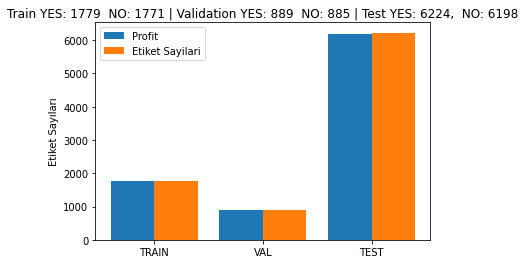

In [13]:
ids = ['TRAIN', 'VAL', 'TEST']
yesnumbers = [len(trainyes), len(valyes), len(testyes)]
nonumbers = [len(trainno), len(valno), len(testno)]

label_count(ids, yesnumbers, nonumbers)

In [14]:
TRAIN_DIR = '/content/TRAIN/'
TEST_DIR = '/content/TEST/'
VAL_DIR = '/content/VAL/'

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, (224,224))
X_test, y_test, _ = load_data(TEST_DIR, (224,224))
X_val, y_val, _ = load_data(VAL_DIR, (224,224))

100%|██████████| 2/2 [00:54<00:00, 27.28s/it]


12422 images loaded from /content/TRAIN/ directory.


100%|██████████| 2/2 [00:18<00:00,  9.37s/it]


3550 images loaded from /content/TEST/ directory.


100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


1774 images loaded from /content/VAL/ directory.


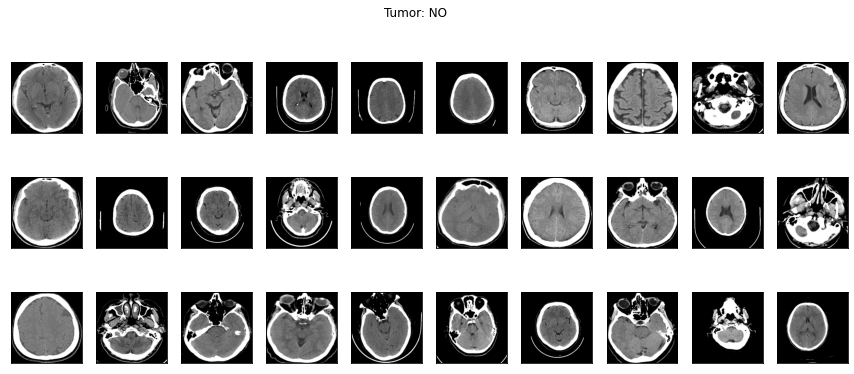

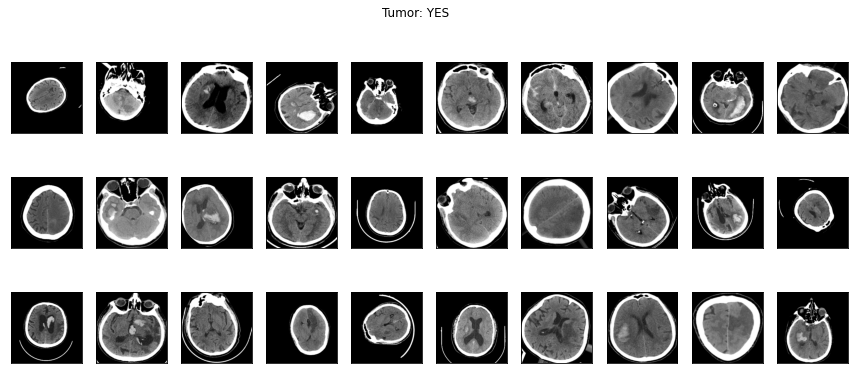

In [15]:
plot_samples(X_train, y_train, labels, 30)

## <a id='dagilimorani'>5.1 Veri Setinin Dağılım Oranı</a>

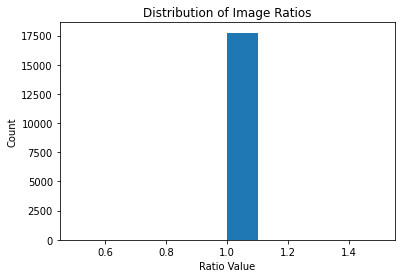

In [16]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [17]:
img = cv2.imread('/content/TRAIN/NO/10008.png')
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

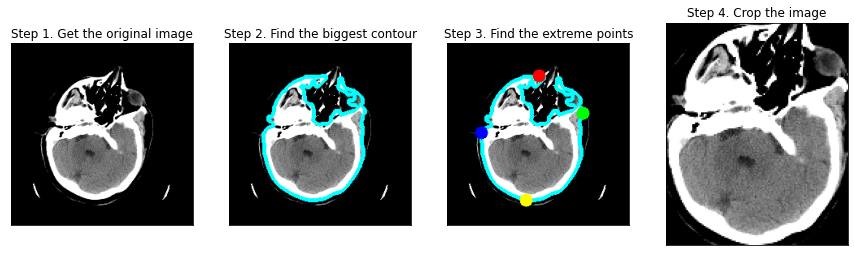

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [19]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

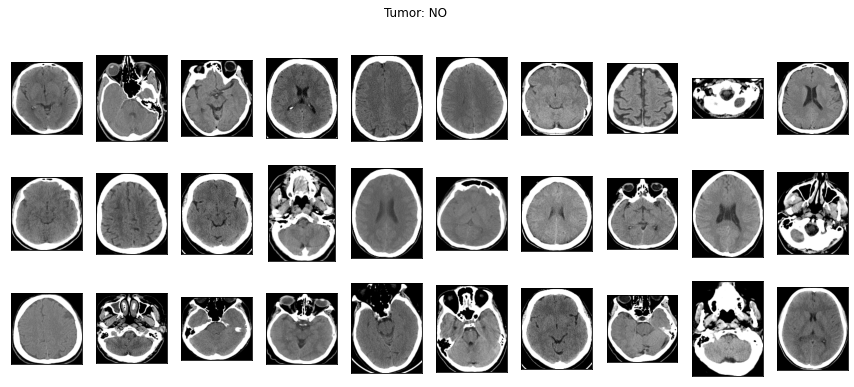

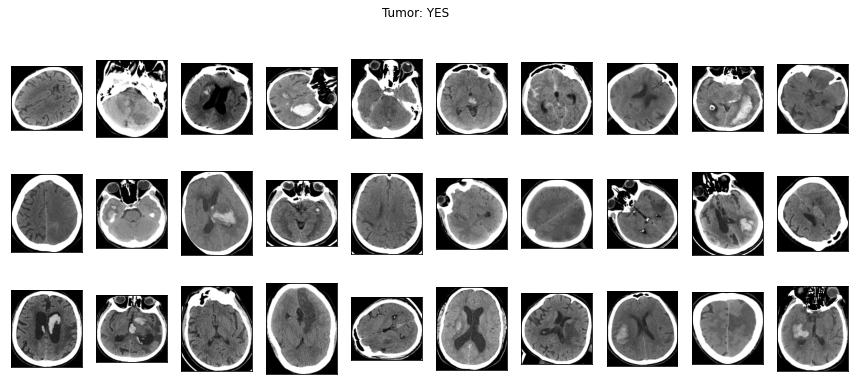

In [20]:
plot_samples(X_train_crop, y_train, labels, 30)

In [21]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [22]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

# <a id='CNN'>6. CNN Modeli</a>

Bu çalışmada kullanılacak olan CNN modeli VGG16'dır.

## <a id='augmentation'>6.1 Veri Çoğaltma</a>
> Veri setimizi her koşulda öğrenmeye uygun olacak şekilde genişletmemiz lazımdır.

In [23]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [24]:
os.mkdir('preview')
x = X_train_crop[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

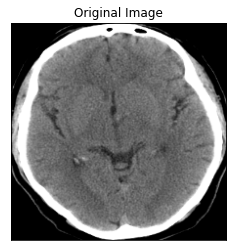

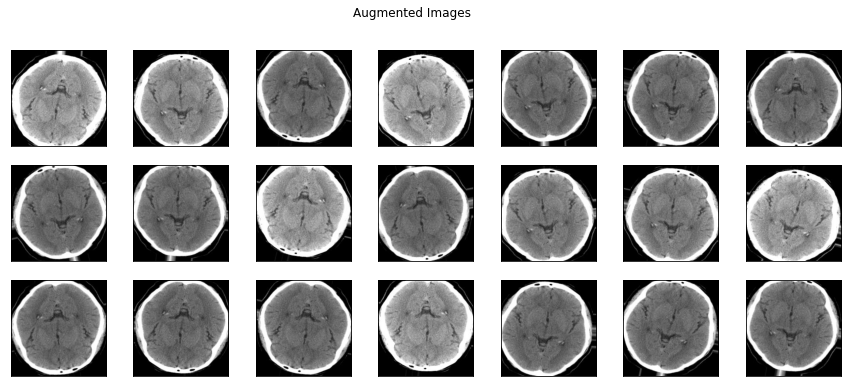

In [25]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augmented Images')
plt.show()

In [26]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'
IMG_SIZE = (224,224)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)

validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 12422 images belonging to 2 classes.
Found 1774 images belonging to 2 classes.


## <a id='model'>4.2 Model İnşası</a>

In [27]:
vgg16 = VGG16(weights='imagenet',
                    include_top = False,
                    input_shape=IMG_SIZE + (3,))

58889256/58889256 [==============================] - 1s 0us/step


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [29]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))


for layer in vgg16.layers[:-3]:   #  vgg16 modeline ait olan son 3 nörondan öncesini öğrenemez
    layer.trainable = False     #  hale getiriyoruz ve eğitime dahil etmiyoruz


model.compile(
    loss='binary_crossentropy',
    optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 40,406,849
Trainable params: 30,411,777
Non-trainable params: 9,995,072
_________________________________________________________________


In [35]:
EPOCHS = 30
es = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=6
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[es]
)

model.save('/content/gdrive/MyDrive/brain_stroke_classification/VGG16_model_3.h5')

  6/388 [..............................] - ETA: 4:45 - loss: 0.0691 - accuracy: 0.9688

KeyboardInterrupt: ignored

In [31]:
"""
TRAIN_DIR = '/content/TRAIN/'
TEST_DIR = '/content/TEST/'
VAL_DIR = '/content/VAL/'

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, (224,224))
X_test, y_test, _ = load_data(TEST_DIR, (224,224))
X_val, y_val, _ = load_data(VAL_DIR, (224,224))
"""

100%|██████████| 2/2 [01:03<00:00, 31.72s/it]


12422 images loaded from /content/TRAIN/ directory.


100%|██████████| 2/2 [00:17<00:00,  8.86s/it]


3550 images loaded from /content/TEST/ directory.


100%|██████████| 2/2 [00:08<00:00,  4.43s/it]

1774 images loaded from /content/VAL/ directory.


In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


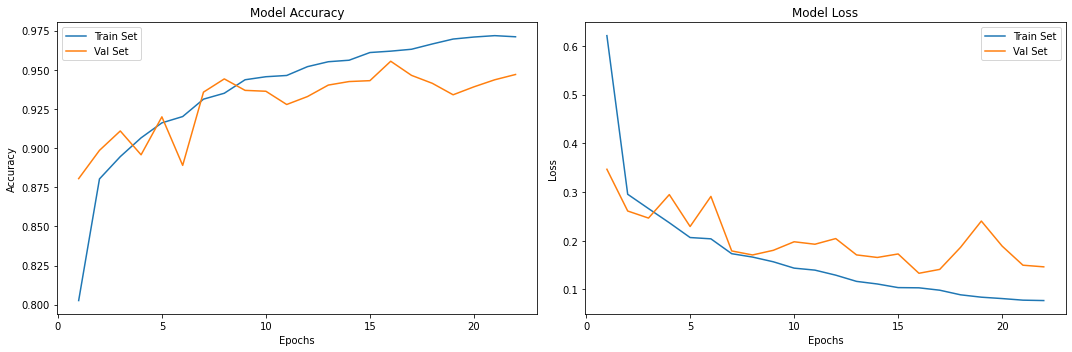

In [37]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

56/56 [==============================] - 9s 158ms/step
Val Accuracy = 0.79


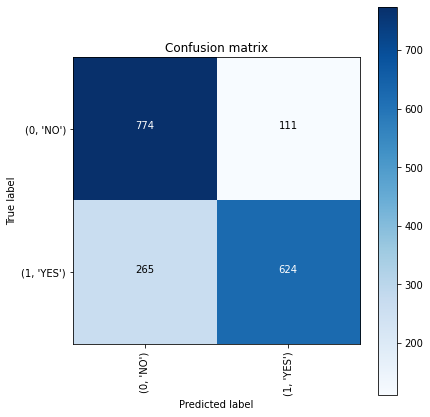

In [38]:
# validate on val set
predictions = model.predict(X_val)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

111/111 [==============================] - 21s 188ms/step
Test Accuracy = 0.81


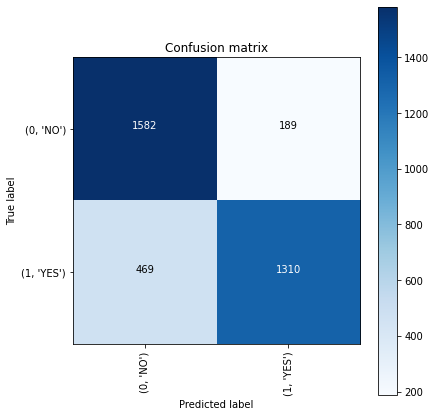

In [39]:
# validate on test set
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [40]:
model.evaluate(X_test, y_test, batch_size=128)

28/28 [==============================] - 36s 875ms/step - loss: 0.5102 - accuracy: 0.8146


[0.5101562142372131, 0.814647912979126]

In [41]:
model.evaluate(X_val, y_val, batch_size=128)

14/14 [==============================] - 19s 1s/step - loss: 0.6234 - accuracy: 0.7880


[0.6234012246131897, 0.788049578666687]

# <a id='test'>7. Test Aşamaları</a>

In [100]:
# test için gereken kütüphaneleri import ediyoruz
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [142]:
print("[INFO] loading object detector...")
model = load_model('/content/gdrive/MyDrive/brain_stroke_classification/VGG16_model_3.h5')  # eğittimiz modelin ağırlıklarını çağırdık
                                                     # bu ağırlığı modele verdik ve model bu ağırlığa göre test yapacak

[INFO] loading object detector...


In [ ]:
def predicter(imagePath):

    im0 = cv2.imread(imagePath)
    im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2RGB)
    im0 = imutils.resize(im0, 224, 224)
    output = im0.copy()
    im0 = im0.astype("float")/255.0
    im0 = img_to_array(im0)
    im0 = np.expand_dims(im0, axis=0)
    proba = model.predict(image)[0]

    predict_x = model.predict(im0)
    classes_x = np.argmax(predict_x, axis=1)

    if classes_x == 0:
        label = "no"
    else:
        label = "yes"

    text = "{}: {:.2f}%".format(label,proba[0]*100)
    cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,0,0), 2)

    fig = plt.figure(figsize=(10,10))
    plt.grid(b=None)
    plt.axis("off")

    return plt.imshow(output)

In [ ]:
imagePath = '/content/TEST/NO/10141.png'
predict(imagePath)

In [ ]:
imagePath = '/content/TEST/NO/10763.png'
predict(imagePath)

In [ ]:
imagePath = '/content/TEST/NO/1150.png'
predict(imagePath)

In [ ]:
imagePath = '/content/TEST/YES/10926.png'
predict(imagePath)

In [ ]:
imagePath = '/content/TEST/YES/11400.png'
predict(imagePath)

In [ ]:
imagePath = '/content/TEST/YES/16681.png'
predict(imagePath)